# Pyincore - Water Facility Damage Analysis

In [8]:
from pyincore import InsecureIncoreClient, InventoryDataset, HazardService
from pyincore.analyses.waterfacilitydamage import WaterFacilityDamage
import traceback

#pip install git+https://git.ncsa.illinois.edu/incore/pyincore.git@INCORE-386-water-facility-damage-analysi


In [3]:
cred = None

In [6]:
try:
    client = InsecureIncoreClient("http://incore2-services.ncsa.illinois.edu:8888", "incrtest")

    facility_dmg = WaterFacilityDamage(client)
    hazard_id = "earthquake/5b902cb273c3371e1236b36b"
    output = WaterFacilityDamage.get_output_metadata()

    # This is the Memphis Water Facility dataset from the Ergo repository
    facilities_dataset = InventoryDataset("waterfacilities") # This should come from data service. Currently, checked in to gitlab
    facilities = facilities_dataset.inventory_set

    # pipeline mapping
    mapping_id = "5b47c3b1337d4a387e85564b" #Hazus Potable Water Facility Fragility Mapping - Only PGA
    mapping_id = "5b47c383337d4a387669d592" #Potable Water Facility Fragility Mapping for INA - Has PGD
    liq_geology_dataset_id = None
    liq_geology_dataset_id = "5ad506f5ec23094e887f4760"
    num_threads = 2
    uncertainity = False

    facility_dmg.get_damage(facilities, mapping_id, hazard_id, liq_geology_dataset_id, uncertainity, num_threads)

except EnvironmentError:
    print("exception")
    traceback.print_exc()


# Visualize output

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dmg-results.csv', delimiter=',')

In [7]:
df.columns = [col.replace('-', '_') for col in df.columns]
#print(df.columns)

**Covert output to plottable structure**

In [8]:
lstName = []
lstVal = []
for i, row in df.iterrows():
    for j, column in row.iteritems():
        if(j in ["none", "slight_mod", "ext_comple", "complete"]):
            lstName.append(j)
            lstVal.append(column)
            


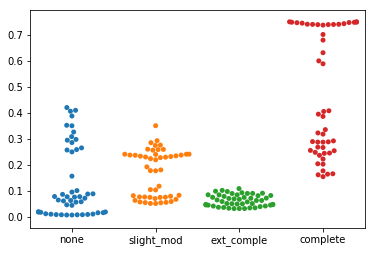

In [9]:
sns.swarmplot(x=lstName, y=lstVal)
plt.show()

**Default line plot**

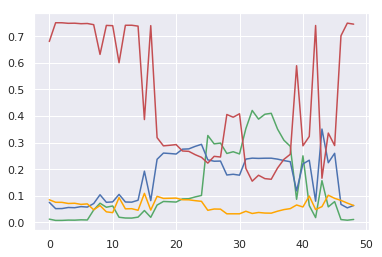

In [94]:
df.none.plot(color='g')
df.slight_mod.plot(color='b')
df.ext_comple.plot(color='orange')
df.complete.plot(color='r')
